In [1]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load The Dataset That is on .CSV FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/H_train.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#Load The Dataset That is on .CSV FIle 
test=pd.read_csv('/content/drive/MyDrive/project/Dataset/H_test.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
#Check The Shape Of The Dataset 
print ('Shape = >',data.shape)

Shape = > (31962, 3)


In [5]:
#Check The Shape Of The Dataset 
print ('Shape = >',test.shape)

Shape = > (17197, 2)


In [6]:
#To Check The NuLL Values If Dataset Have 
data.isnull().sum() 

id       0
label    0
tweet    0
dtype: int64

In [7]:
#To Check The NuLL Values If Dataset Have 
test.isnull().sum() 

id       0
tweet    0
dtype: int64

In [8]:
#Calculate the Ratio For Hate=1
print ('Negitive ratio = ', round(len(data[data['label']==1]) / len(data.label),2)*100,'%')
#Calculate the Ratio For Not  Not Hate
print ('Positive ratio  = ', round(len(data[data['label']==0]) / len(data.label),2)*100,'%')

Negitive ratio =  7.000000000000001 %
Positive ratio  =  93.0 %


In [9]:
#ADD the Length_of_tweet Coulmn of tweet Articel length That Show Each Article Length OF tweet 
data['length_of_tweet'] = data.tweet.str.len()
data.head(2)

,id,label,tweet,length_of_tweet
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122


In [10]:
#ADD the Length_of_tweet Coulmn of tweet Articel length That Show Each Article Length OF tweet 
test['length_of_tweet'] = test.tweet.str.len()
test.head(2)

,id,tweet,length_of_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101


In [11]:
import re
def  clean_text(data, text_field):
  #Remove the Accent For the tweet Column 
  from unicodedata import normalize
  remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
  data['tweet'] = data['tweet'].apply(remove_accent)
  #Convert itno the Lower case
  data['tweet'] = data['tweet'].str.lower()
    #Remove the Punctution 
  data['tweet']= data['tweet'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
  data['tweet'] = data['tweet'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
  data['tweet'] = data['tweet'].str.replace(r'£|\$', 'dollers')
  data['tweet'] = data['tweet'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
  data['tweet'] = data['tweet'].str.replace(r'\d+(\.\d+)?', 'numbr')
  data['tweet'] = data['tweet'].str.replace(r'[^\w\d\s]', ' ')
  data['tweet'] = data['tweet'].str.replace(r'\s+', ' ')
  data['tweet'] = data['tweet'].str.replace(r'^\s+|\s+?$', '')
  return data
data = clean_text(data, "tweet")

In [12]:
import re
def  clean_text(data, text_field):
  #Remove the Accent For the tweet Column 
  from unicodedata import normalize
  remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
  test['tweet'] = test['tweet'].apply(remove_accent)
  #Convert itno the Lower case
  test['tweet'] = test['tweet'].str.lower()
    #Remove the Punctution 
  test['tweet']= test['tweet'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
  test['tweet'] = test['tweet'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
  test['tweet'] = test['tweet'].str.replace(r'£|\$', 'dollers')
  test['tweet'] = test['tweet'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
  test['tweet'] = test['tweet'].str.replace(r'\d+(\.\d+)?', 'numbr')
  test['tweet'] = test['tweet'].str.replace(r'[^\w\d\s]', ' ')
  test['tweet'] = test['tweet'].str.replace(r'\s+', ' ')
  test['tweet'] = test['tweet'].str.replace(r'^\s+|\s+?$', '')
  return test
test = clean_text(test, "tweet")

In [13]:
#Import The Library From NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])
data['tweet']= data['tweet'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [15]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])
test['tweet']= test['tweet'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
#ADD the clean_Length_of_News Coulmn of News Articel length That Show Each Article Length OF News  After Pre-Processing The Each Article 
data['clean_length_tweet'] = data.tweet.str.len()
data.head()

,id,label,tweet,length_of_tweet,clean_length_tweet
0,1,0,user father dysfunctional selfish drags kids d...,102,60
1,2,0,user user thanks lyft credit use cause offer w...,122,87
2,3,0,bihday majesty,21,14
3,4,0,model love take time,86,20
4,5,0,factsguide society motivation,39,29


In [17]:
#ADD the clean_Length_of_News Coulmn of News Articel length That Show Each Article Length OF News  After Pre-Processing The Each Article 
test['clean_length_tweet'] = test.tweet.str.len()
test.head()

,id,tweet,length_of_tweet,clean_length_tweet
0,31963,studiolife aislife requires passion dedication...,90,75
1,31964,user white supremacists want everyone see new ...,101,65
2,31965,safe ways heal acne altwaystoheal healthy healing,71,49
3,31966,hp cursed child book reservations already yes ...,142,77
4,31967,numbrrd bihday amazing hilarious nephew eli ah...,93,74


In [18]:
#Check Th Length of News Each Article Of News Column Before 
print ('Original_Length', data.length_of_tweet.sum())
#Check Th Length of News Each Article Of News Column After 
print ('Clean_Length', data.clean_length_tweet.sum())

Original_Length 2708448
Clean_Length 1845059


In [19]:
#Check Th Length of News Each Article Of News Column Before 
print ('Original_Length', test.length_of_tweet.sum())
#Check Th Length of News Each Article Of News Column After 
print ('Clean_Length', test.clean_length_tweet.sum())

Original_Length 1453944
Clean_Length 991215


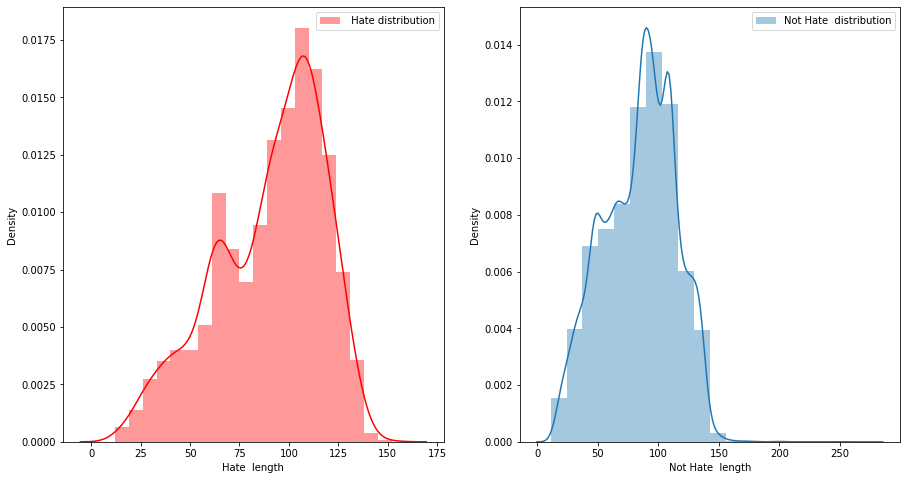

In [20]:
#Show Them it With Help matplotlib Graph Before The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['label']==1]['length_of_tweet'],bins=20,ax=ax[0],label=' Hate distribution',color='r')
ax[0].set_xlabel('Hate  length')
ax[0].legend()
sns.distplot(data[data['label']==0]['length_of_tweet'],bins=20,ax=ax[1],label='Not Hate  distribution')
ax[1].set_xlabel('Not Hate  length')
ax[1].legend()
plt.show()

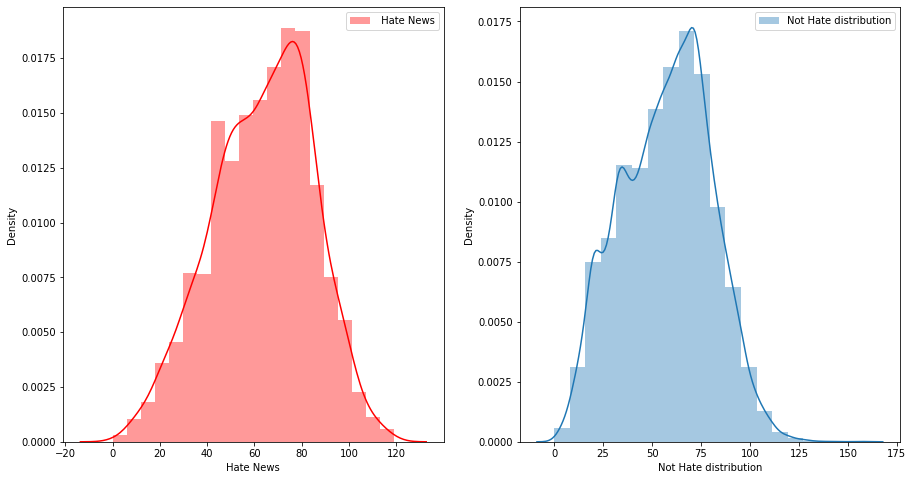

In [21]:
#Show Them it With Help matplotlib Graph after The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['label']==1]['clean_length_tweet'],bins=20,ax=ax[0],label=' Hate News',color='r')
ax[0].set_xlabel('Hate News')
ax[0].legend()
sns.distplot(data[data['label']==0]['clean_length_tweet'],bins=20,ax=ax[1],label='Not Hate distribution')
ax[1].set_xlabel('Not Hate distribution')
ax[1].legend()
plt.show()

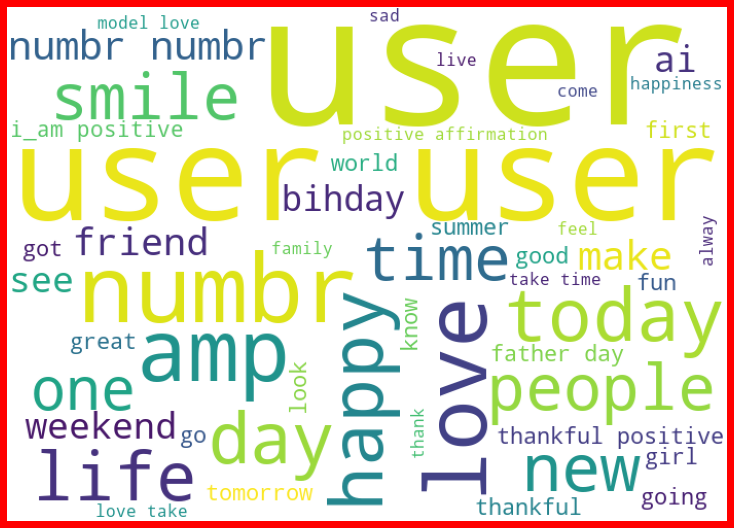

In [22]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not Hate 
from wordcloud import WordCloud
spams = data['tweet'][data['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

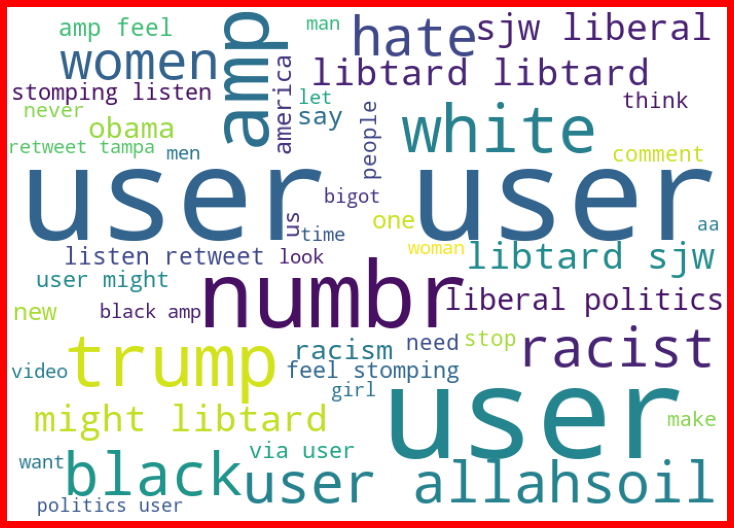

In [23]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not Hate 
from wordcloud import WordCloud
spams = data['tweet'][data['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
from sklearn.utils import resample
train_majority = data[data.label==0]
train_minority = data[data.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
data = pd.concat([train_minority_upsampled, train_majority])
data['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(ngram_range=(1,2))
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['tweet'],
                                                    data['label'],random_state = 0)

In [27]:
model = pipeline_sgd.fit(x_train, y_train)
y_predict = model.predict(x_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9702400856015515

In [28]:
from sklearn.externals import joblib#SAve The Best Model 
model = pipeline_sgd.fit(x_train, y_train)
joblib.dump(model, 'best.pkl')
print ("Best Model (SGD) Saved")


Best Model (SGD) Saved


In [29]:
best = joblib.load('best.pkl')

In [30]:
best

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000,

In [31]:
def find(p):
    if p == 1:
        print ("Tweet is Hate")
    else:
        print ("Tweet is not Hate")

In [32]:
t=test['tweet'].iloc[0:1]

In [33]:
integers1 = tf_vec.fit_transform(t)

In [ ]:
p3 = best.predict(integers1)[0]
